In [1]:
##The required library are imported here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyntcloud import PyntCloud
from pyntcloud import scalar_fields
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors.kde import KernelDensity
import keras
import tensorflow

Using TensorFlow backend.


In [2]:
##The point cloud dataset is taken as input and it is stored in the form of pandas dataframe
cloud=PyntCloud.from_file("/home/rahul/machine learning/Projects/rueMadame_database/GT_Madame1_2.ply")
print(cloud)

PyntCloud
10000000 points with 3 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: -7.090676784515381, -124.74476623535156, 45.12932205200195
Other attributes:



In [3]:
cloud.points.head()

,x,y,z,reflectance,label,class
0,4.971637,-79.606361,43.221432,135.0,13,1
1,3.571728,-81.574989,42.445904,195.0,323,2
2,4.993350,-79.458405,43.303757,135.0,13,1
3,3.720481,-81.474182,42.465771,195.0,323,2
4,5.009287,-79.310478,43.387627,155.0,13,1


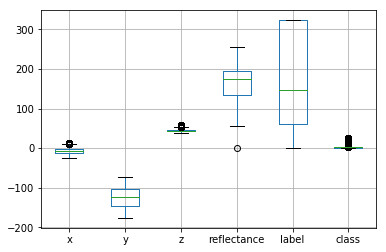

In [4]:
cloud.points.boxplot()

In [5]:
##Visualization of point cloud
cloud.plot()

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-7.090676784515381, -51.14215087890625, 163.…

In [6]:
cloud1=PyntCloud.from_file("/home/rahul/machine learning/Projects/rueMadame_database/GT_Madame1_3.ply")
print(cloud1)

PyntCloud
10000000 points with 3 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: -12.104286193847656, -197.56027221679688, 46.1270637512207
Other attributes:



In [7]:
cloud1.plot()

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-12.104286193847656, -35.43043518066406, 166…

In [8]:
cloud3=PyntCloud(cloud.points[cloud.points["class"]!=2])
cloud3=PyntCloud(cloud3.points[cloud3.points["class"]!=1])

In [9]:
#voxel grid downsampling will be done here
#open3d.voxelgrid_downsampling(cloud,voxel=0.5)
cloud3.points["class"].value_counts()

4     790822
10     81745
14     11463
9       3656
19      3030
15      2542
22      1915
20       983
24       491
23       384
25       379
21       111
0          3
Name: class, dtype: int64

In [10]:
cloud3.plot()

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-7.812506198883057, -51.271156311035156, 155…

In [11]:
##Cacluate 10 neighbours for determining the geometrical features of each point
neigh=cloud3.get_neighbors(k=50)


In [12]:
neigh.shape

(897524, 50)

In [13]:

#kde=KernelDensity(kernel='gaussian',bandwidth=0.2).fit(cloud3.points[['x','y','z']])
#density=kde.score_samples(cloud3.points[['x','y','z']])
#cloud3.points.add(density,axis=1)

#vox=cloud3.add_structure("voxelgrid")
#vox_x=cloud3.add_scalar_field("voxel_x",voxelgrid_id=vox)
#vox_y=cloud3.add_scalar_field("voxel_y",voxelgrid_id=vox)
#vox_n=cloud3.add_scalar_field("voxel_n",voxelgrid_id=vox)
#vox_z=cloud3.add_scalar_field("voxel_z",voxelgrid_id=vox)
#inc=cloud.add_scalar_field("inclination_degrees")
#ori=cloud.add_scalar_field("orientation_degrees")
eig=cloud3.add_scalar_field("eigen_values",k_neighbors=neigh)
ani=cloud3.add_scalar_field("anisotropy",ev=eig)
cur=cloud3.add_scalar_field("curvature",ev=eig)
eigent=cloud3.add_scalar_field("eigenentropy",ev=eig)
su=cloud3.add_scalar_field("eigen_sum",ev=eig)
lin=cloud3.add_scalar_field("linearity",ev=eig)
om=cloud3.add_scalar_field("omnivariance",ev=eig)
pla=cloud3.add_scalar_field("planarity",ev=eig)
sph=cloud3.add_scalar_field("sphericity",ev=eig)


In [14]:

cloud3.points.head()

,x,y,z,reflectance,label,class,e1(51),e2(51),e3(51),anisotropy(51),curvature(51),eigenentropy(51),eigen_sum(51),linearity(51),omnivariance(51),planarity(51),sphericity(51)
12801,3.363989,-85.362411,51.534206,155.0,27,19,0.006112,0.004801,0.001285,0.789751,0.105350,0.065343,0.012198,0.214527,0.003353,0.575223,0.210249
12831,3.329983,-85.357216,51.536343,175.0,27,19,0.005869,0.002909,0.001102,0.812179,0.111569,0.054649,0.009880,0.504367,0.002660,0.307812,0.187821
12860,3.315848,-85.369858,51.559479,175.0,27,19,0.006022,0.002450,0.001185,0.803149,0.122751,0.053501,0.009657,0.593193,0.002596,0.209956,0.196851
12888,3.286167,-85.368858,51.566643,175.0,27,19,0.006207,0.002183,0.001130,0.817957,0.118689,0.052587,0.009520,0.648256,0.002483,0.169701,0.182043
12914,3.299975,-85.643295,51.539997,195.0,27,19,0.004047,0.002875,0.000990,0.755292,0.125162,0.045970,0.007912,0.289576,0.002259,0.465716,0.244708


In [15]:
tree=RandomForestClassifier()

In [16]:

cloud3.points.drop(labels=["label"],inplace=True,axis=1)
cloud3.points.drop(labels=["x","y","z","reflectance"],inplace=True,axis=1)
target=cloud3.points["class"]
cloud3.points.drop(labels=["class"],inplace=True,axis=1)

In [17]:
tree.fit(cloud3.points,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
prediction=tree.predict(cloud3.points)
print("Accuracy:",accuracy_score(target,prediction))

Accuracy: 0.9818924062197779


This is the part where the feature extraction process is applied on the test set

In [19]:
#voxel grid downsampling will be done here
#open3d.voxelgrid_downsampling(cloud1,voxel=0.5)

In [20]:
#p linkage segmentation and feature histogram analyzer

In [21]:
cloud4=PyntCloud(cloud1.points[cloud1.points["class"]!=2])
cloud4=PyntCloud(cloud4.points[cloud4.points["class"]!=1])

In [22]:
neigh1=cloud4.get_neighbors(k=50)

In [23]:
neigh1.shape

(1099746, 50)

In [24]:
#kde=KernelDensity(kernel='gaussian',bandwidth=0.2).fit(cloud.points[['x','y','z']])
#density=kde.score_samples(cloud.points[['x','y','z']])
#cloud.points.add(density,axis=1)
#vox=cloud.add_structure("voxel_grid",x_y_z=cloud.points[['x','y','z']])
#vox_x=cloud.add_scalar_field("voxel_x",voxelgrid_id=vox)
#vox_y=cloud.add_scalar_field("voxel_y",voxelgrid_id=vox)
#vox_z=cloud.add_scalar_field("voxel_z",voxelgrid_id=vox)
#inc=cloud.add_scalar_field("inclination_degrees")
#ori=cloud.add_scalar_field("orientation_degrees")
eig=cloud4.add_scalar_field("eigen_values",k_neighbors=neigh1)
ani=cloud4.add_scalar_field("anisotropy",ev=eig)
cur=cloud4.add_scalar_field("curvature",ev=eig)
eigent=cloud4.add_scalar_field("eigenentropy",ev=eig)
su=cloud4.add_scalar_field("eigen_sum",ev=eig)
lin=cloud4.add_scalar_field("linearity",ev=eig)
om=cloud4.add_scalar_field("omnivariance",ev=eig)
pla=cloud4.add_scalar_field("planarity",ev=eig)
sph=cloud4.add_scalar_field("sphericity",ev=eig)

In [25]:
cloud4.points.drop(labels=["label"],inplace=True,axis=1)
target1=cloud4.points["class"]
cloud4.points.drop(labels=["class"],inplace=True,axis=1)
cloud4.points.drop(labels=["x","y","z","reflectance"],inplace=True,axis=1)

In [30]:
prediction1=tree.predict(cloud4.points)
print("Accuracy:",accuracy_score(target1,prediction1))

Accuracy: 0.9175345943517866
